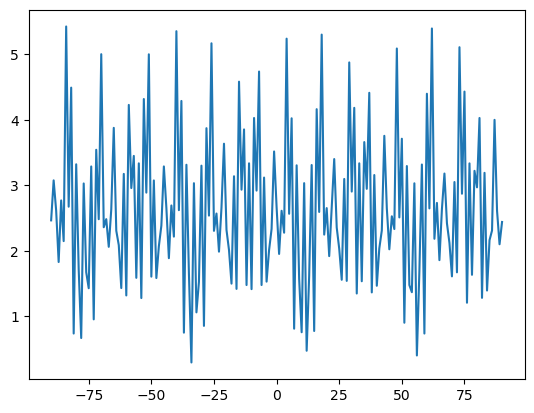

6


In [3]:
from math import pi, exp, sin
from SA_func import f_c, light_speed, read_fft_data, code_V_convert, get_raw_data, chirp_rate, wl

import data_save
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
filename = "/Users/CHJ/Desktop/send/10-23-17-41-58/fft_data"
fft_data = read_fft_data(filename)
data = code_V_convert(fft_data)
raw_data = get_raw_data(data)

N = 8 # TX numbers * RX numbers = 8, number of arrays
center_freq = f_c # 24.15 GHz, the initial frequency of chirp of our FMCW radar
d = 0.006 # 5 mmm, the distance between two adjacent RX antennas
c = light_speed
phase_data = np.angle(raw_data)
phase_data = np.mod(phase_data, 2*pi) # make sure the phase is in the range of [0, 2*pi]
tau = phase_data / (2 * pi * center_freq) # time delay matrix
𝜆 = wl # wavelength matrix
N_col = np.reshape(np.arange(8),(1, 8)).T
theta = np.arange(-90,91) # traverse all the angle from front direction
theta = np.reshape(theta, (1,181))
theta0 = np.angle(raw_data[:,500,250]) * 180 / pi # target beam angle
theta0 = np.reshape(theta0, (1,8))
A = N_col * (1j * 2 * pi * d * np.sin(theta) / 𝜆 )
target_beam = np.exp( 1j * 2 * pi * d  * np.sin(theta0) / 𝜆 ).T
steering_vector = np.exp(A)
result = []
for col in steering_vector.T:
    result.append(np.dot(col, target_beam))
result = np.array(result)  # 转换为 NumPy 数组
result = np.reshape(result, (181))
plt.plot(theta[0], np.abs(result))
plt.show()
print(np.argmax(np.abs(result)))

